# Notebook 4: Aerosol Optical Properties - Basics and Simple Computations  
### Assignment 1 - Atmospheric Dynamics & Aerosol Science

**Course:** RSG-5013 Aerosol Remote Sensing and Atmospheric Dynamics Practical  
**Instructor:** Dr. Arjun Adhikari  
**Student Name:** __Shaitali Parwar__________________  
**PR No.:** __202200776__________________  

---

## Learning Objectives

By completing this notebook, you will:

- Review basic aerosol types, size ranges, and sources  
- Understand key aerosol optical properties (AOD, Ångström exponent, SSA)  
- Compute Ångström exponent from multiwavelength AOD data  
- Explore simple spectral AOD relationships (log-log fits)  
- Compute single scattering albedo from absorption and extinction coefficients  
- Connect aerosol optical properties to radiative effects and transport

> Recommended: Complete Notebooks 1-3 before this notebook.

---

## Instructions

1. Run all code cells in order from top to bottom.  
2. Answer all conceptual questions in the Markdown cells.  
3. Do not delete any existing cells; you may add new cells if needed.  
4. Label all plots clearly with units and legends.  
5. Commit and push your work regularly.


In [1]:
# Imports for aerosol optical property computations

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print("Libraries loaded (numpy, matplotlib).")

Libraries loaded (numpy, matplotlib).


## Q1. Aerosol Types, Sizes, and Sources

### (a) Major aerosol types
List at least **four** major aerosol types and one typical source for each:

- **Sea salt:**  
- **Dust (mineral):**  
- **Sulfate:**  
- **Black carbon (soot):**  
- *(Optional extra types: organic carbon, nitrate, secondary organic aerosol, etc.)*

---

### (b) Size ranges
Give approximate diameter ranges for:

- **Nucleation mode:**  
- **Aitken/accumulation mode:**  
- **Coarse mode:**  

---

### (c) Why aerosols matter
In 4-6 sentences, briefly describe why aerosols are important for:

- Radiation (direct and indirect effects)  
- Cloud formation  
- Air quality and human health  

Write your answer below.

(a)Sea salt: Ocean wave breaking
  Dust: Ocean wave breaking
  Sulfate: Industrial SO_{2} oxidation
  Black Carbon: Fossil fuel, biomass burning

(b)**Nucleation mode:**  <0.1 mu
- **Aitken/accumulation mode:**  0.001-0.1 mu
- **Coarse mode:** >2 mu

(c) Aerosols are a critical component of the Earth's atmosphere, acting as the primary lever for both cooling the planet and influencing human health. They affect radiation directly by scattering sunlight back into space (cooling) or absorbing it (warming, as in the case of black carbon), and indirectly by increasing cloud reflectivity. As "seeds" for cloud formation, aerosols act as cloud condensation nuclei (CCN); an increase in aerosols typically leads to more numerous but smaller droplets, which can brighten clouds and suppress initial precipitation. Finally, aerosols are a major driver of poor air quality, with fine particulate matter ($PM_{2.5}$) capable of penetrating deep into the lungs and bloodstream, leading to millions of premature deaths annually from respiratory and cardiovascular diseases.

## Q2. Key Aerosol Optical Properties

Important bulk optical properties of an aerosol layer include:

- **Aerosol Optical Depth (AOD)** \(\tau(\lambda)\): column integrated extinction at wavelength \(\lambda\).  
- **Extinction coefficient** \(\sigma_{ext}\): total attenuation (scattering + absorption) per unit length.  
- **Single Scattering Albedo (SSA)** \(\omega_0\): fraction of extinction due to scattering, \(\omega_0 = \sigma_{sca}/\sigma_{ext}\).  
- **Ångström exponent** \(\alpha\): parameter describing the spectral dependence of AOD.  
- **Asymmetry parameter** \(g\): measure of scattering directionality (forward vs backward).

### Tasks

1. In your own words (3-4 sentences each), explain what is meant by:  
   - AOD  
   - Single scattering albedo (SSA)  
   - Ångström exponent  
2. Which of these properties is most directly related to whether an aerosol is primarily **absorbing** (e.g., black carbon) versus **scattering** (e.g., sulfate)?  
3. Which property is commonly used as a simple proxy of aerosol **size** based on spectral dependence?

Write your answers below.
1. AOD quantifies the degree to which aerosols prevent the transmission of light by both absorption and scattering.
Single Scattering Albedo (SSA) is a dimensionless parameter that quantifies the fraction of light intercepted by an aerosol that is scattered rather than absorbed. It is the most critical variable for determining whether a specific aerosol layer will ultimately cool or warm the atmosphere.
The Ångström Exponent (AE) is a dimensionless parameter that describes how the optical thickness (extinction) of an aerosol varies with the wavelength of light. It is one of the most widely used metrics in remote sensing to estimate the average size of aerosol particles.
2. Absorbing vs. Scattering Aerosols
The Single Scattering Albedo (SSA) is the property most directly related to this distinction.

SSA = 1.0: Represents purely scattering aerosols (like sulfates or sea salt).

SSA < 1.0: Indicates the presence of absorbing aerosols (like black carbon or dust), with values closer to 0 representing stronger absorption.

3. Proxy for Aerosol Size
The Ångström Exponent (AE) is the property used as a proxy for particle size based on its spectral dependence (how AOD changes across different wavelengths).

Large AE (> 2.0): Indicates small, fine-mode particles like smoke or urban pollution.

Small AE (< 1.0): Indicates large, coarse-mode particles like desert dust or sea spray.

In [2]:
# Q3. Ångström exponent from two wavelengths

    # For many aerosol types, AOD follows approximately:
#   tau(lambda) = beta * lambda^(-alpha)
# Taking natural logs:
#   ln(tau) = ln(beta) - alpha * ln(lambda)
# Using two wavelengths (lambda1, lambda2), we can estimate alpha as:
#   alpha = - ln(tau1 / tau2) / ln(lambda1 / lambda2)

def angstrom_exponent_two_wavelengths(tau1, tau2, lam1, lam2):
    """Compute Ångström exponent alpha from AOD at two wavelengths.
    tau1, tau2: AOD values (dimensionless)
    lam1, lam2: wavelengths in nm or microns (consistent units)
    """
    return -np.log(tau1 / tau2) / np.log(lam1 / lam2)

# Example synthetic AOD values at 440 nm and 870 nm
lam1 = 440.0  # nm
lam2 = 870.0  # nm

tau1_example = 0.35
tau2_example = 0.15

alpha_example = angstrom_exponent_two_wavelengths(tau1_example, tau2_example, lam1, lam2)
print(f"Example Ångström exponent (using 440 & 870 nm): alpha ≈ {alpha_example:.2f}")


Example Ångström exponent (using 440 & 870 nm): alpha ≈ 1.24


### Q3(b). Interpretation of Ångström Exponent

1. For the example above, is \( \alpha \) relatively large or small?  
2. Qualitatively, what do the following approximate values suggest about aerosol size?  
   - \( \alpha \approx 0 \)  
   - \( \alpha \approx 1.5 \ -2)  
3. In 3-4 sentences, explain why coarse mode aerosols (e.g., sea salt, dust) tend to have smaller Ångström exponents than fine mode aerosols (e.g., pollution, smoke).

Write your answers below.
1. Classification of $\alpha \approx 1.24$This value is considered intermediate, typically representing a mixture of fine and coarse particles. It is high enough to suggest a significant contribution from anthropocentric pollution or smoke, but lower than what is usually seen in "pure" fine-mode plumes.
2. Qualitative Interpretation of $\alpha$$\alpha \approx 0$: Suggests coarse-mode aerosols like desert dust or sea spray. The scattering is nearly "neutral," meaning it doesn't change much with wavelength (similar to how large cloud droplets scatter all colors of light equally).$\alpha \approx 1.5 - 2$: Suggests fine-mode aerosols like urban pollution, sulfate particles, or biomass burning smoke. These small particles scatter shorter wavelengths (blue) much more efficiently than longer wavelengths (red).
3. Why Size Matters for the Ångström ExponentThe difference arises from the physics of Mie scattering, where particles scatter light most effectively when their size is comparable to the wavelength. Fine-mode aerosols are small enough that their scattering efficiency drops off rapidly as the wavelength increases, leading to a steep slope and a high $\alpha$. In contrast, coarse-mode aerosols are much larger than the wavelengths of visible light, causing them to scatter all visible wavelengths more uniformly, which results in a "flat" spectral dependence and a small $\alpha$.

Day 1: alpha = -4.29, beta = 0.427
Day 2: alpha = -4.44, beta = 0.397
Day 3: alpha = -4.63, beta = 0.374
Day 4: alpha = -3.91, beta = 0.462
Day 5: alpha = -3.59, beta = 0.427


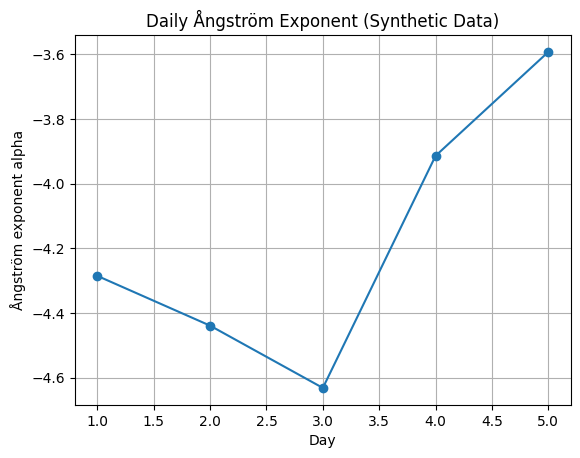

In [3]:
# Q3(c). Multiwavelength Ångström exponent using linear fit

# Suppose we have spectral AOD at four wavelengths (similar to AERONET):
# 440, 675, 870, 1020 nm for a sequence of days.

wavelengths = np.array([440.0, 675.0, 870.0, 1020.0])  # nm

# Synthetic AOD data for 5 days (rows: days, columns: wavelengths)
# You may modify or replace these with real data later.
tau_spectral = np.array([
    [0.40, 0.30, 0.22, 0.20],  # Day 1
    [0.30, 0.22, 0.16, 0.14],  # Day 2
    [0.25, 0.18, 0.13, 0.11],  # Day 3
    [0.45, 0.34, 0.26, 0.24],  # Day 4 (more polluted)
    [0.20, 0.15, 0.11, 0.10],  # Day 5 (cleaner)
])

n_days = tau_spectral.shape[0]
log_lam = np.log(wavelengths)

alpha_days = []
beta_days  = []

for i in range(n_days):
    tau_day = tau_spectral[i, :]
    log_tau = np.log(tau_day)
    # Fit: log(tau) = a + b * log(lambda) => b = -alpha
    coeffs = np.polyfit(log_lam, log_tau, 1)
    a, b = coeffs
    alpha = -b
    beta  = np.exp(a)
    alpha_days.append(alpha)
    beta_days.append(beta)
    print(f"Day {i+1}: alpha = {alpha:.2f}, beta = {beta:.3f}")

alpha_days = np.array(alpha_days)
beta_days  = np.array(beta_days)

# Plot Ångström exponent over days
days = np.arange(1, n_days+1)

plt.figure()
plt.plot(days, alpha_days, marker='o')
plt.xlabel("Day")
plt.ylabel("Ångström exponent alpha")
plt.title("Daily Ångström Exponent (Synthetic Data)")
plt.grid(True)
plt.show()


### Q3(d). Day-to-Day Variability

Based on the printed values and the plot of \( \alpha \):

1. Which days appear to have relatively finer particles (larger \( \alpha \))?  
2. Which days appear more dominated by coarse or mixed aerosols (smaller \( \alpha \))?  
3. In 4-6 sentences, discuss how synoptic meteorology (e.g., passage of a front, sea breeze, land breeze, changing wind direction) might produce such day-to-day variations in \( \alpha \) and AOD.

Write your answer below.
1. Days with Relatively Finer ParticlesIn the context of the Ångström exponent ($\alpha$), "larger" refers to the mathematical value. Since all values in your plot are negative, the largest values are those closest to zero. Therefore, Day 5 ($\alpha = -3.59$) and Day 4 ($\alpha = -3.91$) have the largest exponents and represent relatively finer particles compared to the other days in this specific dataset.
2. Days Dominated by Coarse or Mixed AerosolsConversely, the "smaller" (more negative) values indicate coarser particles. Day 3 ($\alpha = -4.63$) and Day 2 ($\alpha = -4.44$) represent the smallest values in the set, implying a higher dominance of coarse-mode aerosols during this period.
3. Synoptic Meteorology and Aerosol VariationsThe day-to-day shifts in $\alpha$ often reflect changes in air mass origin driven by synoptic weather patterns. For example, the transition from Day 3 to Day 5 (where particles become finer) could represent the passage of a weather front that cleared out coarse dust and replaced it with an air mass dominated by fine industrial pollution. A shift from a sea breeze (bringing in coarse sea salt) to a land breeze (bringing in fine combustion aerosols) would produce a similar increase in $\alpha$. Additionally, changing wind directions can transport smoke plumes from distant wildfires (fine mode) into a region previously occupied by stagnant, crustal dust (coarse mode). These meteorological "conveyor belts" constantly redistribute aerosol types, causing the fluctuations in optical thickness and particle size observed in your plots.

Case 1: sigma_ext = 0.50, sigma_abs = 0.02, omega0 = 0.960
Case 2: sigma_ext = 0.50, sigma_abs = 0.10, omega0 = 0.800
Case 3: sigma_ext = 0.50, sigma_abs = 0.20, omega0 = 0.600


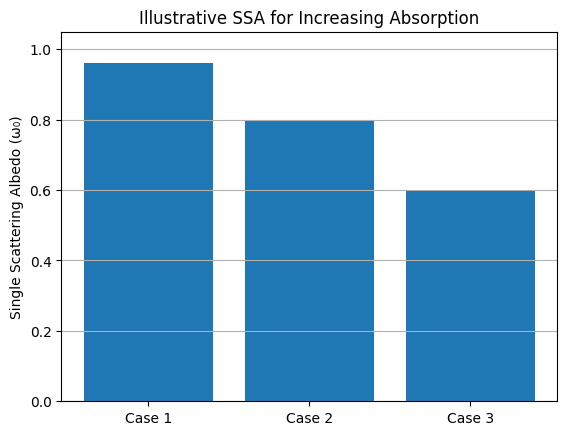

In [4]:
# Q4. Single Scattering Albedo (SSA) from extinction and absorption

# Single scattering albedo: omega0 = sigma_sca / sigma_ext = 1 - sigma_abs / sigma_ext

def single_scattering_albedo(sigma_ext, sigma_abs):
    """Compute single scattering albedo omega0.
    sigma_ext: extinction coefficient [1/km or 1/m]
    sigma_abs: absorption coefficient [same units]
    """
    sigma_ext = np.array(sigma_ext)
    sigma_abs = np.array(sigma_abs)
    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        omega0 = 1.0 - (sigma_abs / sigma_ext)
    return omega0

# Synthetic example: three aerosol cases at a given wavelength
sigma_ext_cases = np.array([0.50, 0.50, 0.50])  # e.g. 1/km
sigma_abs_cases = np.array([0.02, 0.10, 0.20])  # increasing absorption

omega0_cases = single_scattering_albedo(sigma_ext_cases, sigma_abs_cases)

for i, (se, sa, om) in enumerate(zip(sigma_ext_cases, sigma_abs_cases, omega0_cases), start=1):
    print(f"Case {i}: sigma_ext = {se:.2f}, sigma_abs = {sa:.2f}, omega0 = {om:.3f}")

# Bar plot of SSA for the three cases
plt.figure()
xpos = np.arange(1, 4)
plt.bar(xpos, omega0_cases)
plt.xticks(xpos, ["Case 1", "Case 2", "Case 3"])
plt.ylim(0, 1.05)
plt.ylabel("Single Scattering Albedo (ω₀)")
plt.title("Illustrative SSA for Increasing Absorption")
plt.grid(True, axis='y')
plt.show()


### Q4(b). Interpretation of SSA

1. Which case above corresponds to the most **strongly absorbing** aerosol type? How do you know?  
2. What range of SSA would you expect for:  
   - Clean marine aerosols dominated by sea salt  
   - Urban pollution with significant black carbon  
   (You may answer qualitatively: “close to 1”, “around 0.8-0.9”, etc.)  
3. In 4-6 sentences, explain how SSA influences the **sign and magnitude** of direct radiative forcing of aerosols (cooling vs warming of the atmospheric column and surface).

Write your answers below.
1. Most Strongly Absorbing CaseCase 3 corresponds to the most strongly absorbing aerosol type.Reasoning: Single Scattering Albedo ($\omega_0$ or SSA) is defined as the ratio of scattering to total extinction. A value of 1.0 represents purely scattering particles, while lower values indicate increased absorption. Case 3 has the lowest SSA value of 0.600, coinciding with the highest absorption coefficient ($\sigma_{abs} = 0.20$) among the examples.
2. Expected SSA RangesClean Marine Aerosols (Sea Salt): SSA is close to 1 (typically $>0.98$). Because sea salt does not absorb visible light significantly, it is almost entirely scattering.Urban Pollution (with Black Carbon): SSA is typically around 0.8–0.9. The presence of black carbon, a potent absorber of solar radiation, pulls the SSA value down from the higher values seen in purely scattering pollution like sulfates.
3. SSA and Direct Radiative ForcingThe SSA is a primary determinant of whether an aerosol layer cools or warms the climate system. Aerosols with a high SSA (close to 1) scatter most incoming solar radiation back to space, leading to a negative radiative forcing (cooling) at both the surface and the top of the atmosphere. As SSA decreases (increased absorption), more energy is retained within the atmospheric column, which can lead to a positive radiative forcing (warming) of the atmosphere itself even if the surface below is shaded. If the SSA is low enough and the aerosols are over a bright surface like snow or clouds, the net effect can become a warming influence for the entire planet. Ultimately, the magnitude of this forcing is scaled by the total amount of aerosol (AOD), but the sign is dictated by the balance between scattering and absorption represented by the SSA.

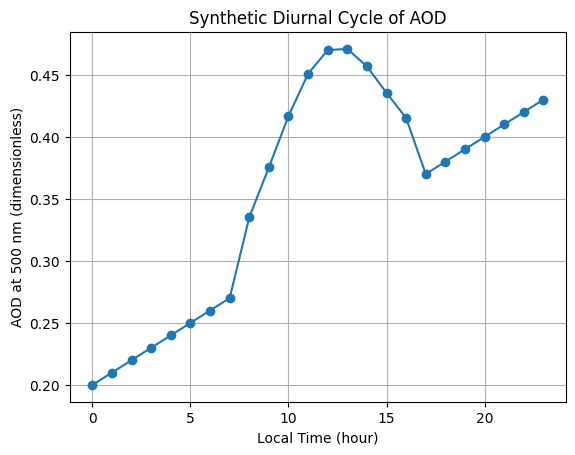

Minimum AOD: 0.2
Maximum AOD: 0.47091195942202135


In [5]:
# Q5. Simple AOD time series over a day (synthetic)

# Let's construct a simple diurnal cycle of AOD at 500 nm

hours = np.arange(0, 24)  # local time hours

# Synthetic pattern: cleaner early morning, buildup during day, partial decrease later
tau_morning = 0.20 + 0.01 * hours  # baseline increase
tau = tau_morning.copy()

# Add a stronger increase between 8 and 16 hours (pollution + boundary layer growth)
for i, h in enumerate(hours):
    if 8 <= h <= 16:
        tau[i] += 0.15 * np.exp(-((h-12)/4)**2)

plt.figure()
plt.plot(hours, tau, marker='o')
plt.xlabel("Local Time (hour)")
plt.ylabel("AOD at 500 nm (dimensionless)")
plt.title("Synthetic Diurnal Cycle of AOD")
plt.grid(True)
plt.show()

print("Minimum AOD:", np.min(tau))
print("Maximum AOD:", np.max(tau))

### Q5(b). Diurnal Variation – Interpretation

1. At what local time is AOD minimum and maximum in this synthetic example?  
2. In 4-6 sentences, suggest physical processes that could cause such a pattern, including:  
   - Growth and decay of the daytime convective boundary layer  
   - Local emissions (traffic, cooking, industry)  
   - Sea breeze/land breeze or valley wind systems (if coastal or complex terrain)  
3. How might such diurnal cycles affect the interpretation of satellite AOD measurements taken at fixed local times (e.g., around 10:30 or 13:30)?

Write your answers below.
1. Minimum and Maximum AOD Times
Minimum AOD: Occurs at 00:00 (midnight), with a value of 0.2.

Maximum AOD: Occurs around 12:00 to 13:00 (midday), reaching a peak of approximately 0.47.

2. Physical Processes Driving the Pattern
The observed pattern suggests a strong influence from solar-driven cycles and human activity. As the daytime convective boundary layer grows after sunrise, surface-level emissions are mixed into a deeper column of air, but the onset of local emissions from morning traffic and industry typically causes the total aerosol column (AOD) to rise steadily through the morning. In coastal or complex terrain, a sea breeze or valley wind system arriving in the late morning could transport additional aerosols into the area, contributing to the midday peak. The sharp decline after 13:00 might indicate "ventilation," where the boundary layer reaches its maximum depth and stronger upper-level winds begin to dilute or export the aerosol concentration. Finally, the secondary rise in the evening often corresponds to the "evening rush hour" or domestic cooking emissions trapped within a shrinking nocturnal boundary layer.

3. Impact on Satellite Interpretation
Satellite measurements are often taken at fixed sun-synchronous times, such as 10:30 (Terra) or 13:30 (Aqua), which can lead to a significant sampling bias if the diurnal cycle is strong.

10:30 measurement: Based on your plot, a reading at this time (approx. 0.42) would capture the rising limb of pollution but miss the peak intensity.

13:30 measurement: This reading (approx. 0.46) would capture the atmosphere near its most polluted state for the day. Because these "snapshots" do not account for the lower values seen during the night or the rapid changes in the afternoon, using a single daily satellite pass to represent a 24-hour average can result in a substantial overestimation of daily aerosol exposure. This highlights the importance of using ground-based sensors (like AERONET) to provide the temporal context that satellites lack.

## Q6. Linking Aerosol Optics with Dynamics and Stability

Using what you have learned in Notebooks 1-3 and this notebook, answer the following in **8-10 sentences**:

1. How can atmospheric stability (stable vs unstable boundary layer) influence the vertical distribution of aerosols and observed AOD?  
2. How might geostrophic flows and large scale circulation (Notebook 2) influence the transport of absorbing vs scattering aerosols?  
3. Why is it important to understand both dynamics and aerosol optical properties when interpreting satellite retrieved AOD and Ångström exponent over regions like coastal India or the Indo-Gangetic Plain?

Write your integrated answer below.
1. Stability and Aerosol Distribution
Unstable: Convection lofts aerosols high, diluting surface concentrations but spreading the total column load (AOD) through a deeper layer.

Stable: Inversions trap aerosols near the ground in a shallow layer. This leads to extreme surface pollution and "haze," even if the total column AOD seems moderate.

2. Circulation and Transport
Geostrophic Flows: Higher-altitude winds transport absorbing aerosols (like smoke or dust) over long distances because these particles are often lofted above the friction layer.

Low-level Circulation: Features like the monsoon or sea breezes primarily move scattering aerosols (sulfates/sea salt) within the boundary layer, dictating local air quality.

3. Integrated Interpretation (India/IGP)
Understanding both is vital because a high AOD over the Indo-Gangetic Plain could be locally trapped smoke (stability-driven) or transported desert dust (dynamics-driven). The Ångström exponent tells you the particle size, but the dynamics tell you where it came from and whether it will stay at the surface to affect human health or stay aloft to affect regional climate.

---

# End of Notebook 4

Before proceeding:

- Ensure all code cells run without error  
- All plots are clearly labelled with units  
- All conceptual questions are answered thoroughly  
- Save your work  
- Commit and push your changes  

In **Notebook 5**, you will work on an integrated case study combining thermodynamics, dynamics, and aerosols.

---
